### Regression Tree, Random Forest and Features Importance demo

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Data Set Characteristics:  
A. Abadie (2003), “Semiparametric Instrumental Variable Estimation of Treatment Response Models,” Journal of Econometrics 113, 231-263.
http://zmjones.com/static/causal-inference/abadie-jep-2003.pdf
    
    Number of Instances: 9275
    
    Attribute Information
        e401k = 1 if eligble for 401(k)
        inc   = annual income, $1000s
    marr  = 1 if married
    male  = 1 if male respondent
    age   = in years
    fsize = family size
    nettfa= net total fin. assets, $1000
        p401k = 1 if participate in 401(k)
        pira  = 1 if have IRA
        incsq = inc^2
        agesq = age^2



### 1. Instructions

1. Read the data into Pandas.
2. Explore the data by sorting, plotting, group_by, and any other ideas/techniques you have been using.

In [2]:
data = pd.read_csv('C:/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/401_k_abadie/401ksubs.csv')
data.head(2)

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.17,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.23,0,1,35,1,154.000,1,0,3749.1130,1225


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275 entries, 0 to 9274
Data columns (total 11 columns):
e401k     9275 non-null int64
inc       9275 non-null float64
marr      9275 non-null int64
male      9275 non-null int64
age       9275 non-null int64
fsize     9275 non-null int64
nettfa    9275 non-null float64
p401k     9275 non-null int64
pira      9275 non-null int64
incsq     9275 non-null float64
agesq     9275 non-null int64
dtypes: float64(3), int64(8)
memory usage: 797.1 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
e401k,9275.0,0.392129,0.488252,0.0000,0.0000,0.000,1.0000,1.000
inc,9275.0,39.254641,24.090002,10.0080,21.6600,33.288,50.1600,199.041
marr,9275.0,0.628571,0.483213,0.0000,0.0000,1.000,1.0000,1.000
male,9275.0,0.204420,0.403299,0.0000,0.0000,0.000,0.0000,1.000
age,9275.0,41.080216,10.299517,25.0000,33.0000,40.000,48.0000,64.000
fsize,9275.0,2.885067,1.525835,1.0000,2.0000,3.000,4.0000,13.000
nettfa,9275.0,19.071675,63.963838,-502.3020,-0.5000,2.000,18.4495,1536.798
p401k,9275.0,0.276226,0.447154,0.0000,0.0000,0.000,1.0000,1.000
pira,9275.0,0.254340,0.435513,0.0000,0.0000,0.000,1.0000,1.000
incsq,9275.0,2121.192483,3001.469424,100.1601,469.1556,1108.091,2516.0255,39617.320


In [5]:
data.corr().T

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
e401k,1.000000,0.268178,0.080843,-0.027641,0.031526,0.012015,0.143950,0.769170,0.118643,0.206618,0.017526
inc,0.268178,1.000000,0.362008,-0.069871,0.105638,0.110170,0.376586,0.270833,0.364354,0.940161,0.087305
marr,0.080843,0.362008,1.000000,-0.363950,0.059047,0.564814,0.075039,0.085636,0.116925,0.280060,0.054500
male,-0.027641,-0.069871,-0.363950,1.000000,-0.120297,-0.320678,-0.018132,-0.024949,-0.036361,-0.053715,-0.116235
age,0.031526,0.105638,0.059047,-0.120297,1.000000,-0.030536,0.203906,0.025977,0.238557,0.097584,0.992619
fsize,0.012015,0.110170,0.564814,-0.320678,-0.030536,1.000000,-0.031506,0.014296,-0.043629,0.079570,-0.055924
nettfa,0.143950,0.376586,0.075039,-0.018132,0.203906,-0.031506,1.000000,0.187392,0.345917,0.407568,0.203703
p401k,0.769170,0.270833,0.085636,-0.024949,0.025977,0.014296,0.187392,1.000000,0.153033,0.222113,0.015740
pira,0.118643,0.364354,0.116925,-0.036361,0.238557,-0.043629,0.345917,0.153033,1.000000,0.322805,0.233543
incsq,0.206618,0.940161,0.280060,-0.053715,0.097584,0.079570,0.407568,0.222113,0.322805,1.000000,0.082991


In [6]:
data.groupby(['male', 'marr'])['age'].agg(np.mean).reset_index()

,male,marr,age
0,0,0,41.622180
1,0,1,41.742069
2,1,0,38.250367
3,1,1,39.619850


In [7]:
data.groupby(['male', 'p401k'])['age'].agg(np.mean).reset_index()

,male,p401k,age
0,0,0,41.569164
1,0,1,42.062500
2,1,0,38.463225
3,1,1,39.143154


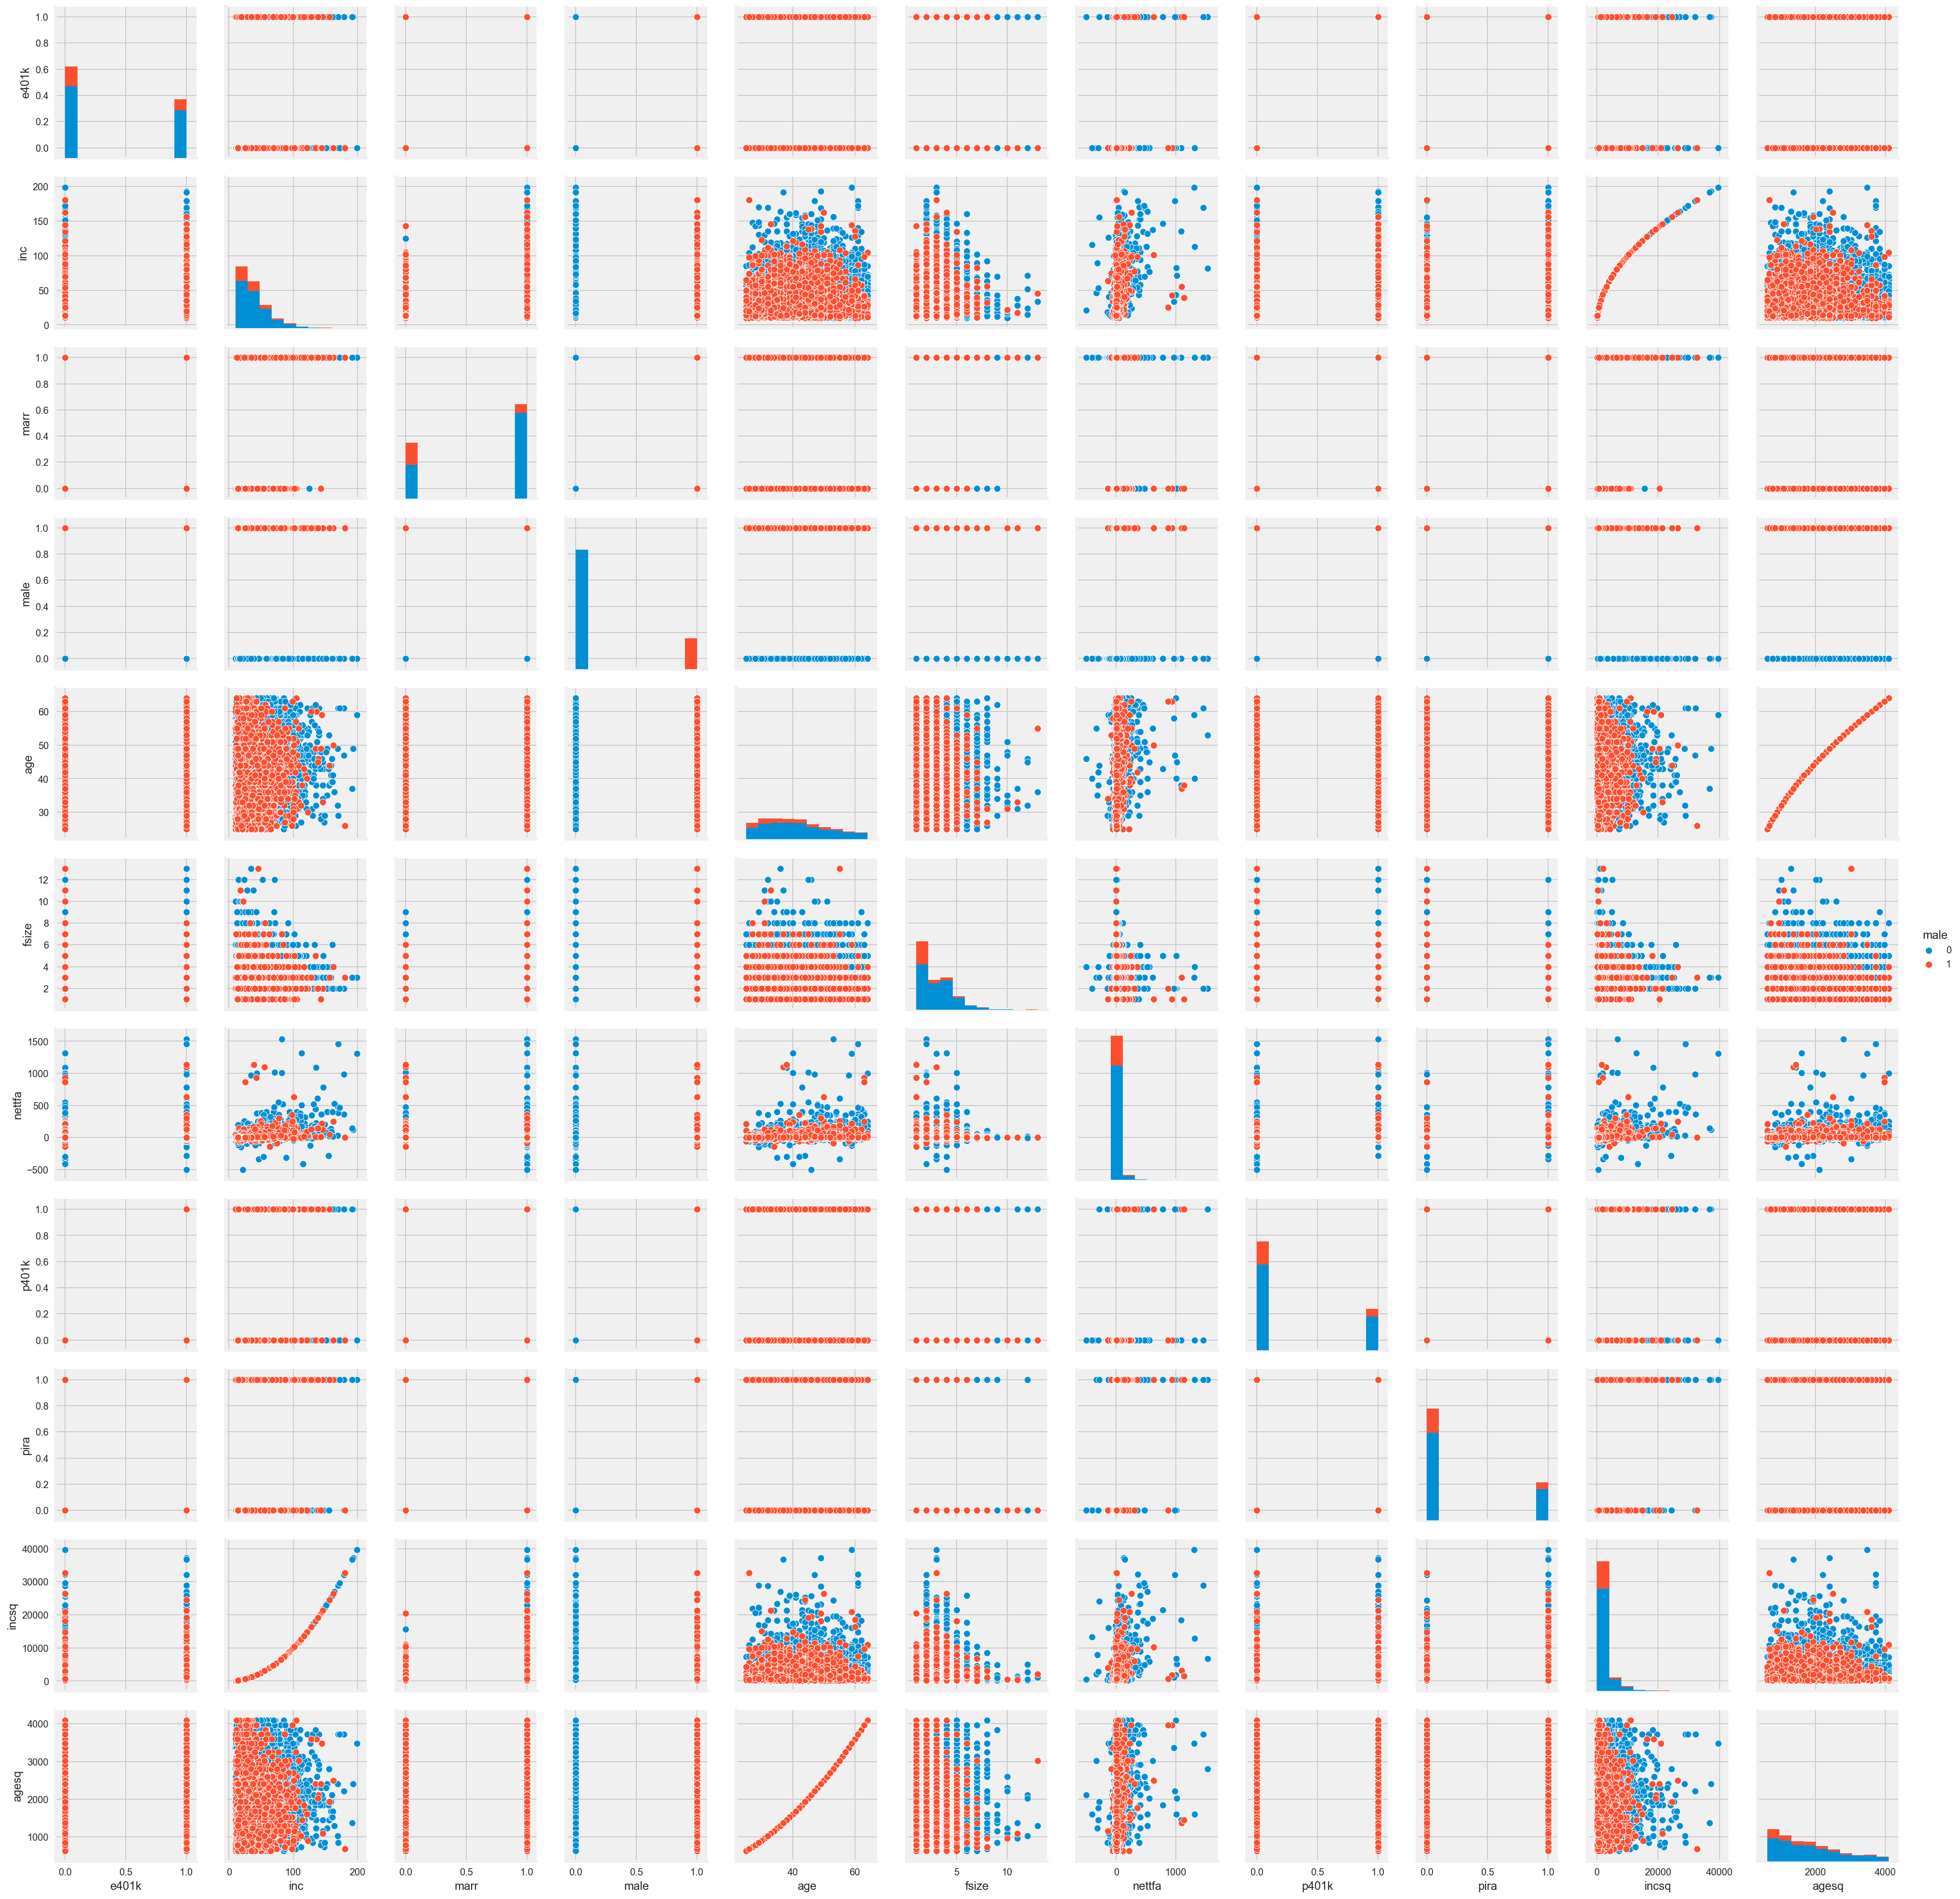

In [8]:
sns.pairplot(data, hue='male', kind='scatter')
plt.show()

In [9]:
def dist_plotter(title, data, color):
    ''' here we set the canvas'''
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    '''here we set the components of the graph'''
    dist = sns.distplot(data, hist_kws={'alpha':0.6}, kde_kws={'linewidth':2}, color = color)
    
    '''here we define the mean and the components for the mean line'''
    dist.axvline(np.mean(data), lw=3, c='darkred', ls='--')
    average_roll = '{0:.2f}'.format(np.mean(data))
    
    '''here we add the title'''
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})

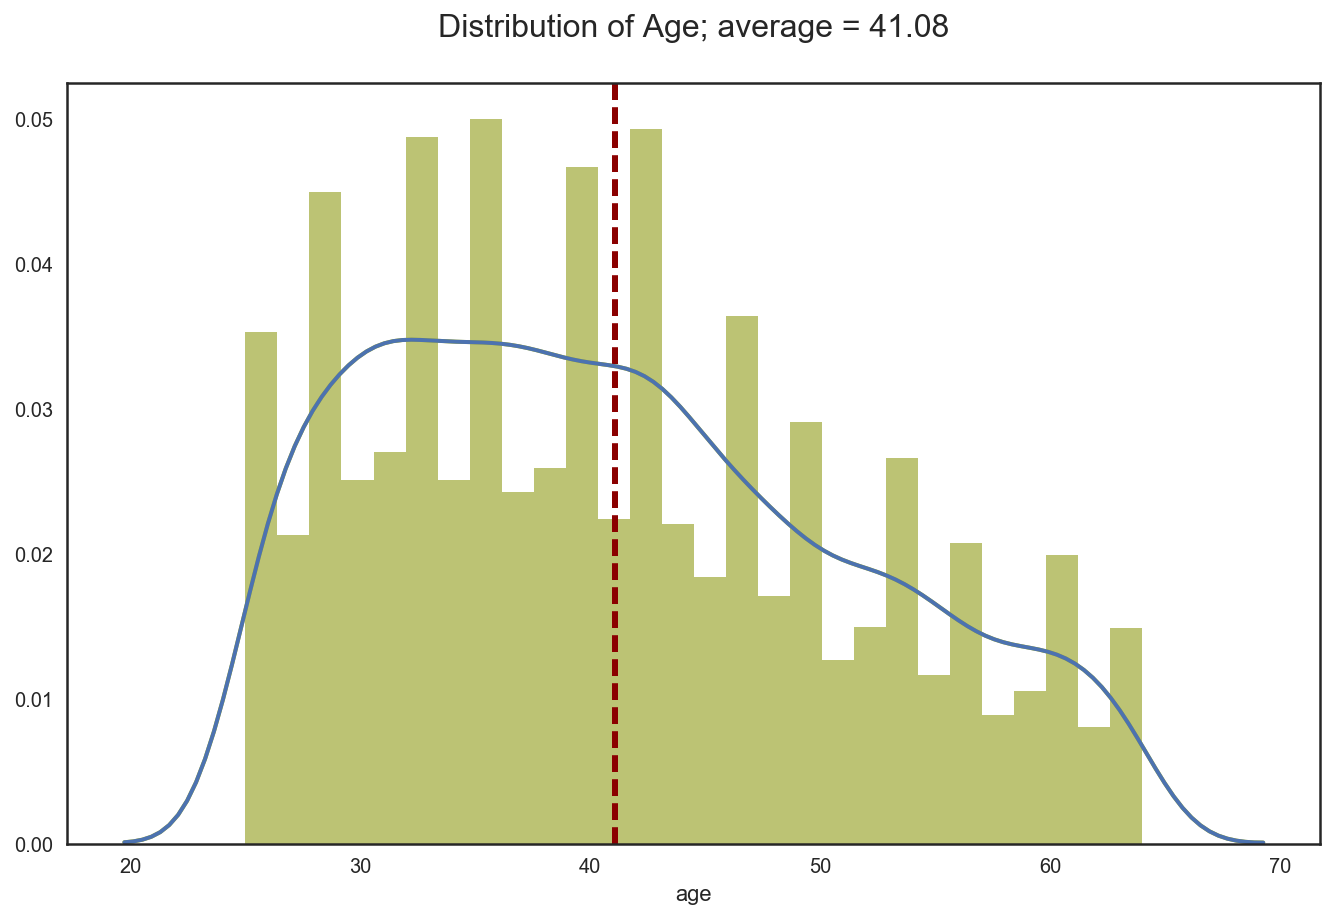

In [10]:
dist_plotter("Age", data.age, 'y')

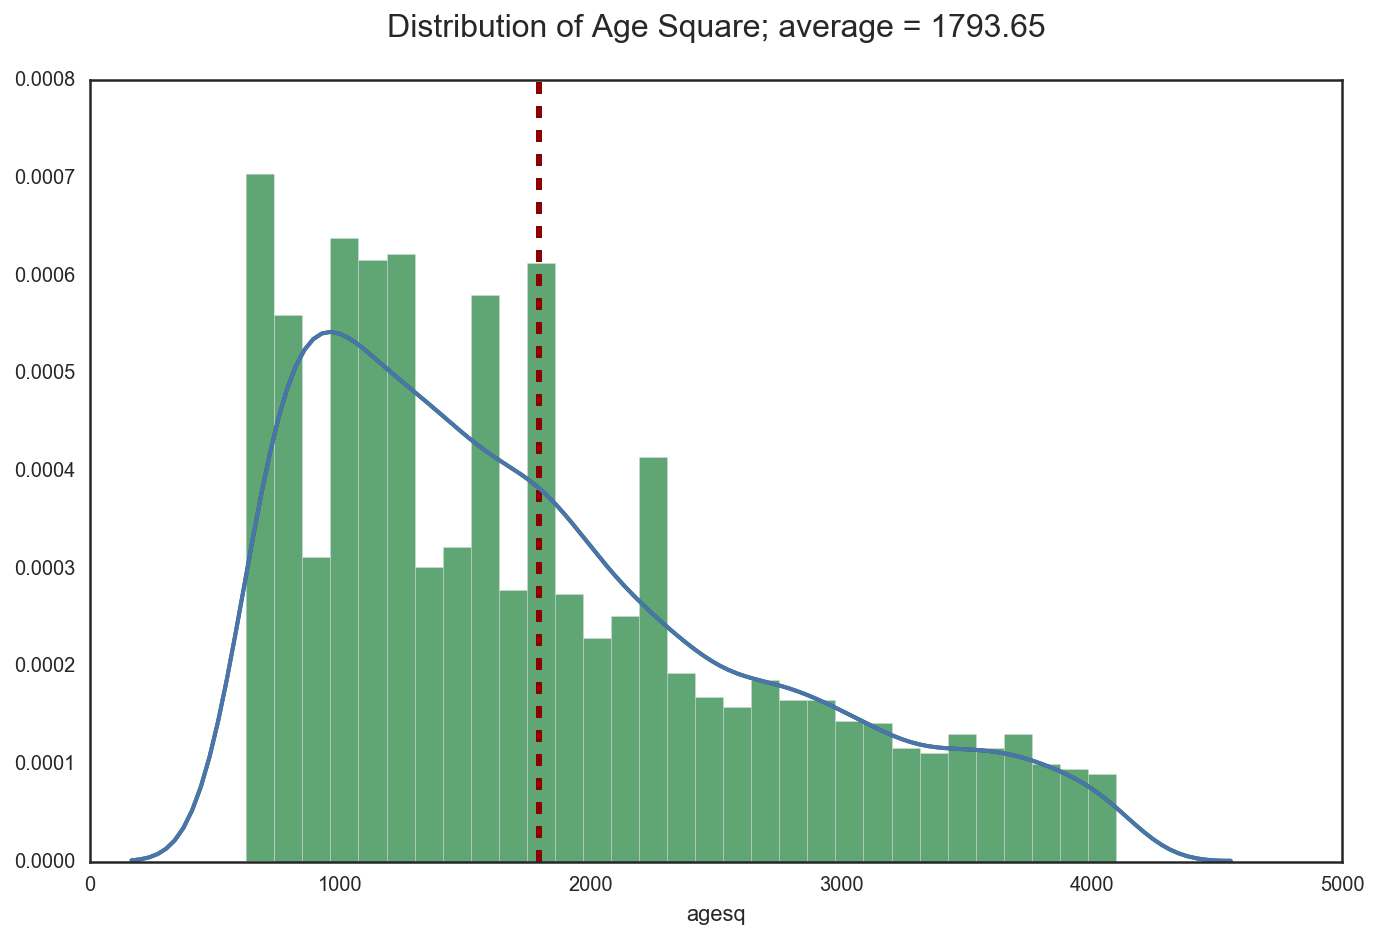

In [11]:
dist_plotter("Age Square", data.agesq, 'g')

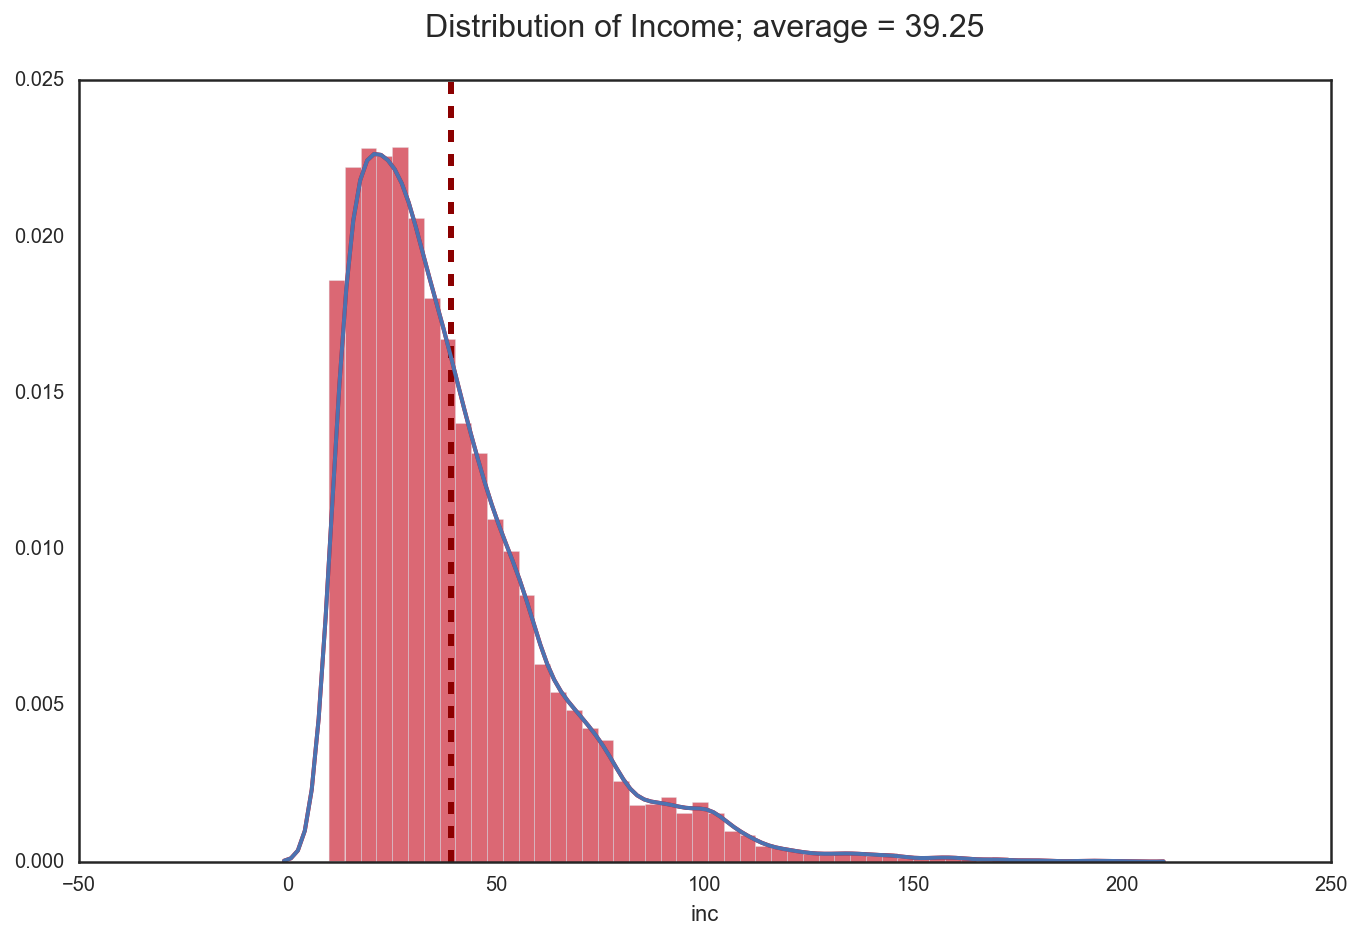

In [12]:
dist_plotter("Income", data.inc, 'red')

A. Log the income variable 

In [13]:
data['log_inc'] =  np.log10(data['inc'])
data[['log_inc','inc']].head(3)
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html#numpy.log10

,log_inc,inc
0,1.119586,13.170
1,1.786964,61.230
2,1.109173,12.858


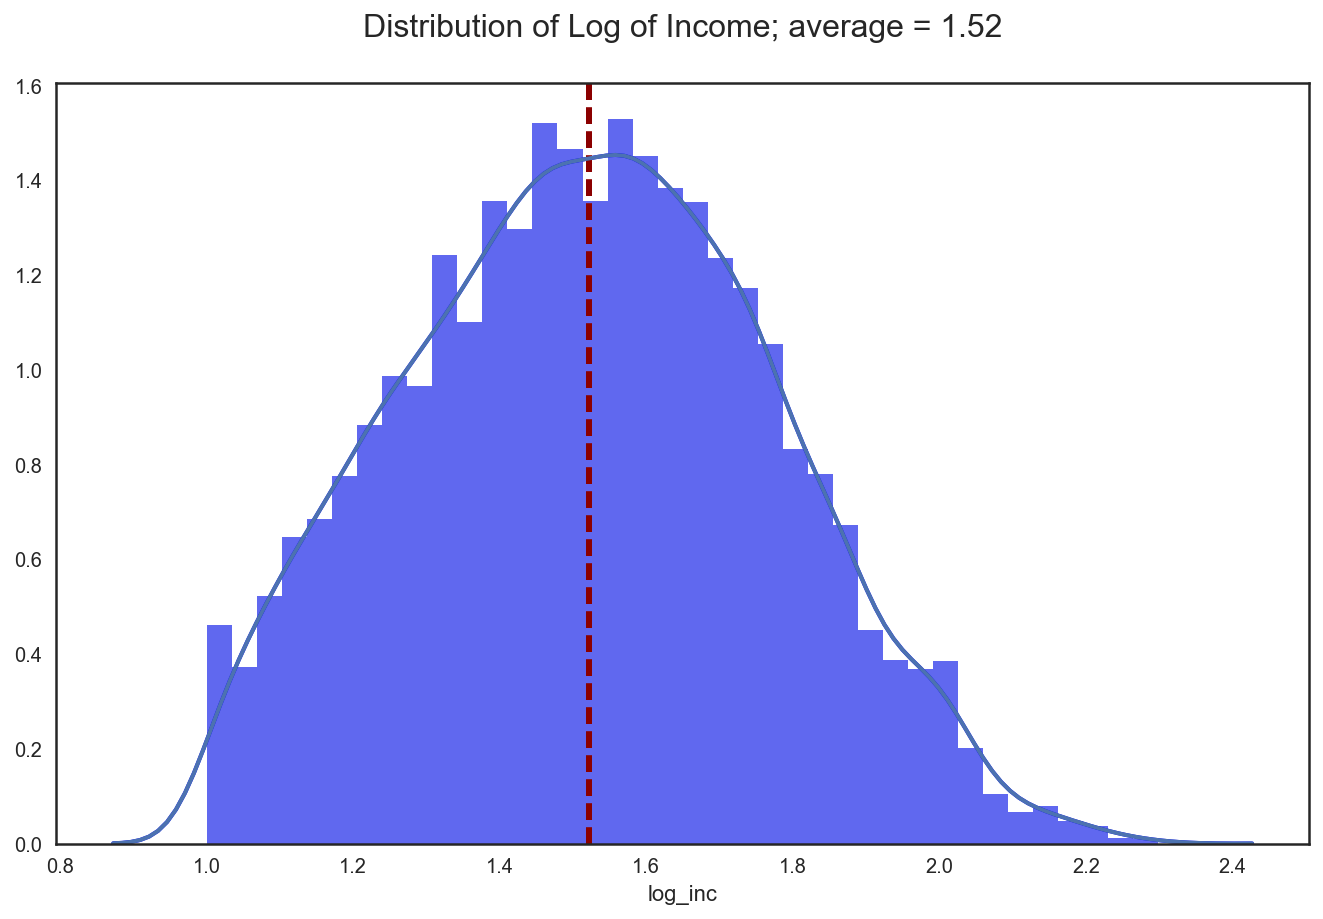

In [14]:
dist_plotter("Log of Income", data.log_inc, 'b')

## 2. Regression Tree
1. Can we predict income?

In [15]:
## Define y
y = data['log_inc']

## Define X (exclude inc, incsq, log_inc)
columns_ = data.columns.tolist()
exclude_cols = ['inc', 'incsq', 'log_inc'] 
#TO EXCLUDE SOME VAR FROM THE WHOLE DATA FRAME

X = data[[i for i in columns_ if i not in exclude_cols]] 
#IF THE VAR ARE NOT IN EXCLUDED LIST

## Print shapes of y and X
print y.shape, X.shape

(9275L,) (9275, 9)


In [16]:
## Train test split 70/30
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Print shapes of X(s) and y(s)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(6492, 9) (6492L,)
(2783, 9) (2783L,)


C:\Users\mjors_000\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 2.1 Build a regression tree
Use DecisionTreeRegressor here is the [link] [1] to the documentation, gridsearch the parmeters, and cross validate => cv = 5 times

[1]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html    "link"


In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch, and we are asking the computer to go and find the one that gives the best model
#we specify th
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"], #n.b:none will overfit the model
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1) 
#NB:njobs=-1 removes the criteria after its already used.

### A. Now fit your tree

In [19]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 593 out of 600 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    9.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

### B. Print best estimator, best parameters, and best score

In [20]:
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=7,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 7, 'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10}


best score 0.399605061387


In [ ]:
#the tree was created in the formula above

# best score is like the fit we had for the model that explains the log of income

### C. Print Feature importances

In [22]:
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [23]:
feature_importance(X, dtr_best)

,feature,importance
5,nettfa,0.651178
1,marr,0.283761
0,e401k,0.027646
3,age,0.023477
8,agesq,0.009612
2,male,0.003757
6,p401k,0.000569
4,fsize,0.000000
7,pira,0.000000


### D. Predict 
#####  Remember you always predict on the test data

In [25]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 1.33989093,  1.66102785,  1.25712738, ...,  1.25712738,
        1.66102785,  1.25712738])

### E. Evaluate the performance of your model 
#### MSE in train and test data, R2 in train and test data

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [27]:
# TO EVALUATE THE MODEL THAT WORKS BEST, WE NEED TO EVALUATE MSE, THAT IS WHY WE DEFINE A NEW FUNCTION
''' Function that calls the MSE and R^2 at once, using the name of the method and calling the best model'''

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [28]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.04, test data: 0.04
R^2 Regression tree train data: 0.43, test data: 0.39


### F. Visualize your tree USING the "best" parameteres/estimators

In [29]:
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

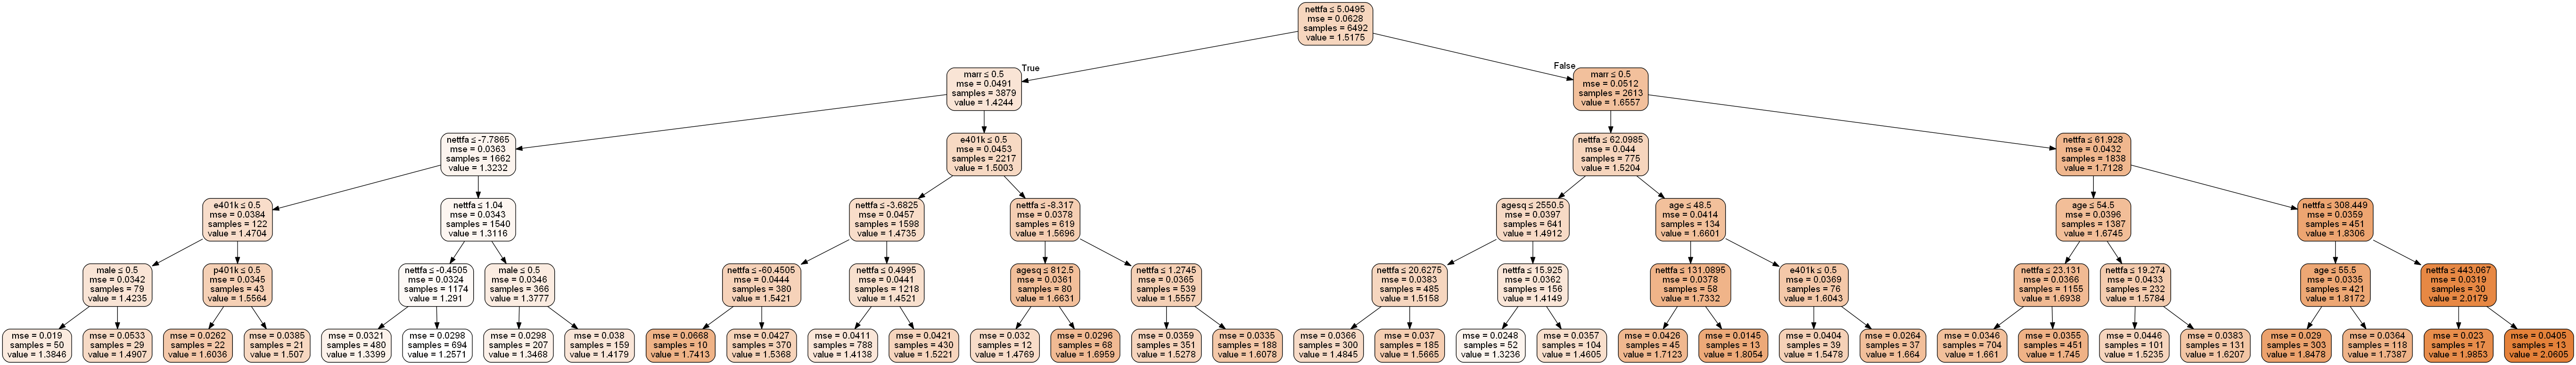

In [30]:
dot_data = StringIO()
''' dtr_best was defined before in section B'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [ ]:
#nb: the top of the tree is the X variable that explains the most the log income, then the second one is married, then 
#following that, second line, if he is married, then next, ....

## 2. Random Forest Regression Tree

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

### A. Now fit your Random Forest tree

In [32]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

### B. Print best estimator, best parameters, and best score

In [33]:
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=4, max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 4, 'n_estimators': 100, 'max_depth': 5}


best score 0.383934007028


### C. Print Feature importances

In [34]:
feature_importance(X, rfr_best)

,feature,importance
5,nettfa,0.506839
1,marr,0.291559
7,pira,0.100936
0,e401k,0.052960
4,fsize,0.027188
6,p401k,0.017646
8,agesq,0.001389
3,age,0.000984
2,male,0.000499


### D. Predict 
#####  Remember you always predict on the test data

In [35]:
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 1.34213817,  1.65622171,  1.3238136 , ...,  1.32369915,
        1.66556275,  1.35987355])

### E. Evaluate the performance of your model 
#### MSE in train and test data, R2 in train and test data

In [36]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.04, test data: 0.04
R^2 Random Forest Regression tree train data: 0.39, test data: 0.37
